In [11]:
import pandas as pd


df = pd.read_csv('./Tasla_Stock_Updated_V2.csv')


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.head())


            Unnamed: 0       Open       High        Low      Close    Volume
Date                                                                        
2015-01-02           0  14.858000  14.883333  14.217333  14.620667  71466000
2015-01-05           1  14.303333  14.433333  13.810667  14.006000  80527500
2015-01-06           2  14.004000  14.280000  13.614000  14.085333  93928500
2015-01-07           3  14.223333  14.318667  13.985333  14.063333  44526000
2015-01-08           4  14.187333  14.253333  14.000667  14.041333  51637500


In [1]:
import pandas as pd

df = pd.read_csv('./Tasla_Stock_Updated_V2.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

first_date = df.index.min().strftime('%Y-%m-%d')
last_date = df.index.max().strftime('%Y-%m-%d')

print(f"{first_date} ... {last_date}")


2015-01-02 ... 2024-01-16


In [12]:
df.isna().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

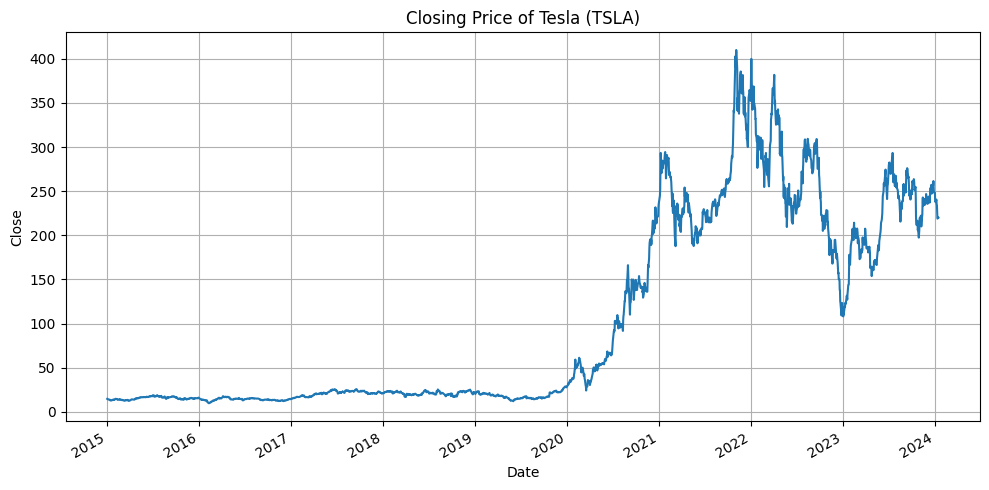

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load and prepare Tesla stock data
df = pd.read_csv('./Tasla_Stock_Updated_V2.csv')  # Make sure extension is correct
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot
plt.figure(figsize=(10, 5))
df['Close'].plot(title='Closing Price of Tesla (TSLA)', grid=True, ylabel='Close')
plt.tight_layout()
plt.show()


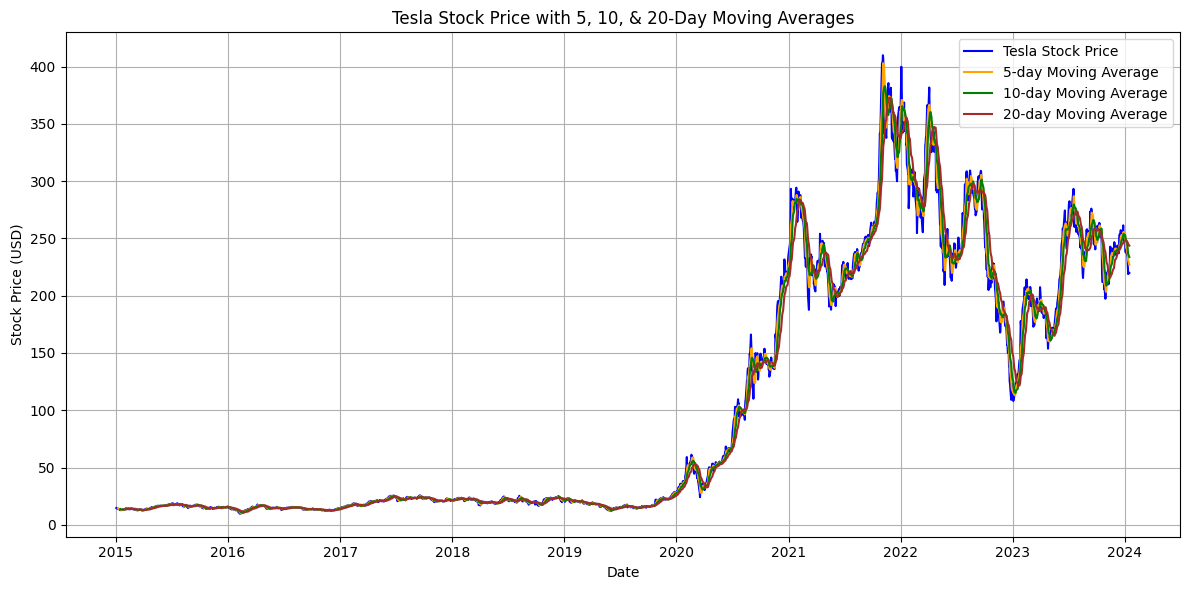

In [16]:
import matplotlib.pyplot as plt



df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Tesla Stock Price', color='blue')
plt.plot(df['MA5'], label='5-day Moving Average', color='orange')
plt.plot(df['MA10'], label='10-day Moving Average', color='green')
plt.plot(df['MA20'], label='20-day Moving Average', color='brown')

plt.title('Tesla Stock Price with 5, 10, & 20-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




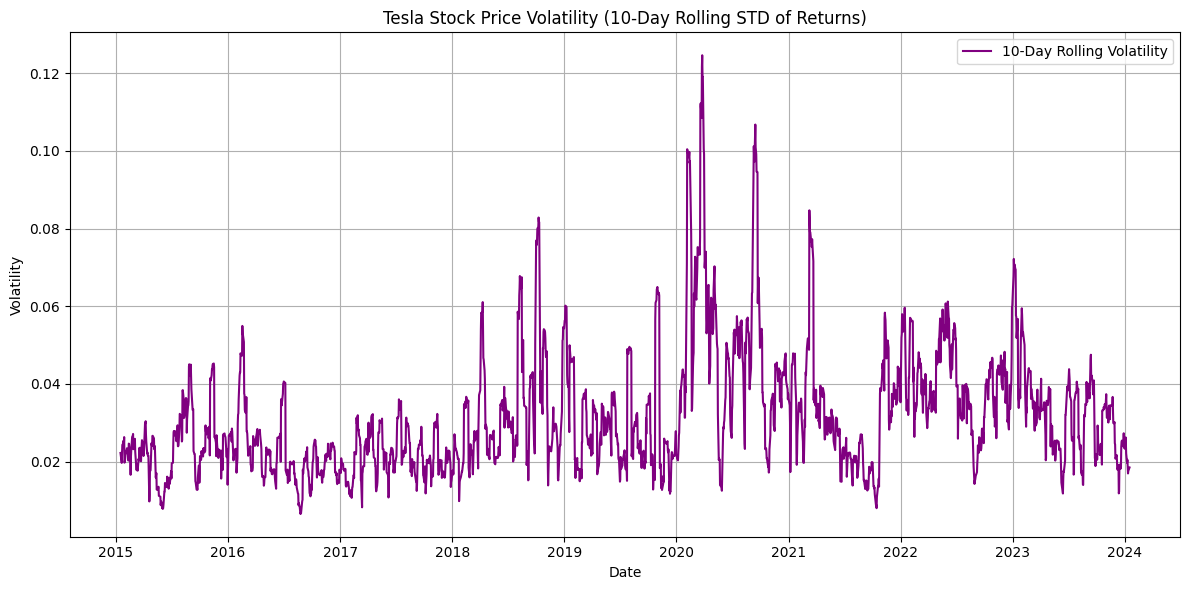

In [17]:
import matplotlib.pyplot as plt

# Calculate 20-day rolling volatility (standard deviation of daily returns)
df['Volatility'] = df['Close'].pct_change().rolling(window=10).std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Volatility'], label='10-Day Rolling Volatility', color='purple')

plt.title('Tesla Stock Price Volatility (10-Day Rolling STD of Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


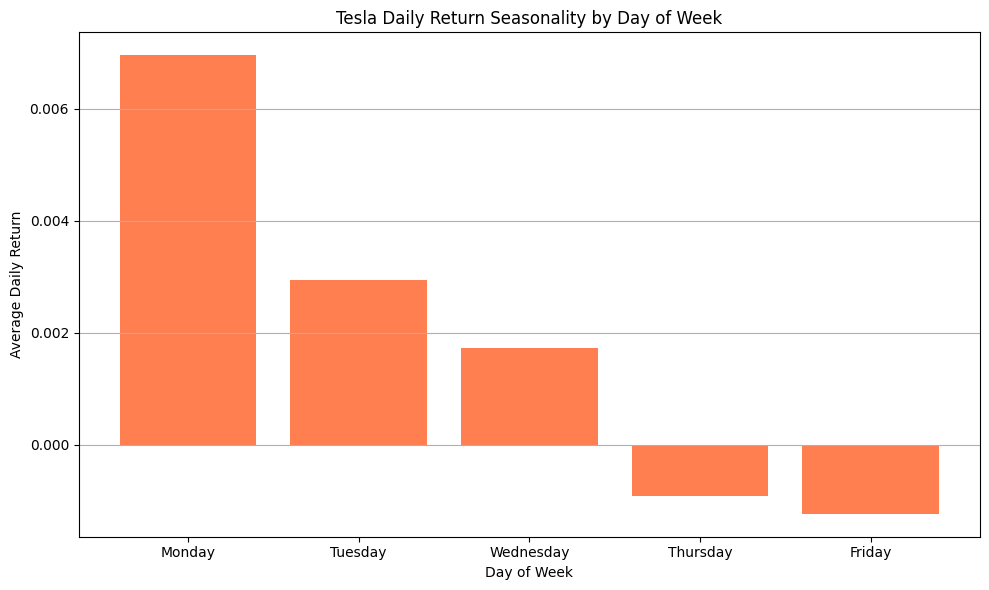

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Date index is datetime
df.index = pd.to_datetime(df.index)

# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Add a column for the day of the week
df['Day of Week'] = df.index.day_name()  # e.g., 'Monday', 'Tuesday', ...

# Group by day of the week and calculate average return
dow_seasonality = df.groupby('Day of Week')['Daily Return'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(dow_seasonality.index, dow_seasonality.values, color='coral')
plt.title('Tesla Daily Return Seasonality by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Daily Return')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


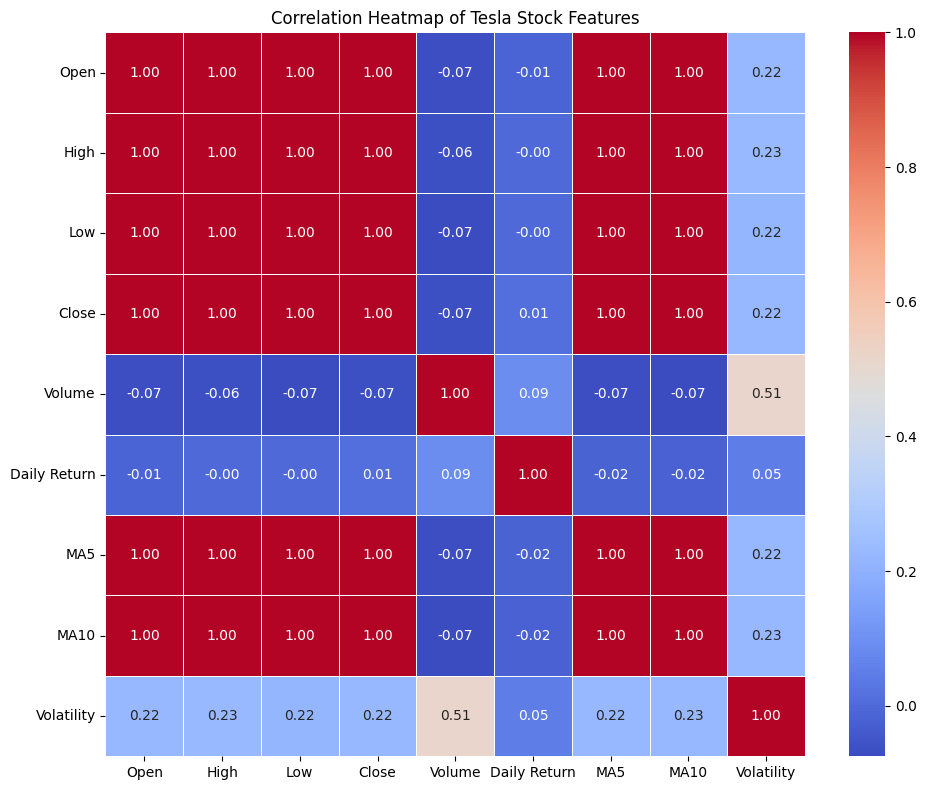

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure relevant features are calculated
df['Daily Return'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['Volatility'] = df['Daily Return'].rolling(window=20).std()

# Select only numerical columns of interest
corr_df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return', 'MA5', 'MA10', 'Volatility']]

# Drop rows with NaNs from rolling/window calculations
corr_df = corr_df.dropna()

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Tesla Stock Features')
plt.tight_layout()
plt.show()


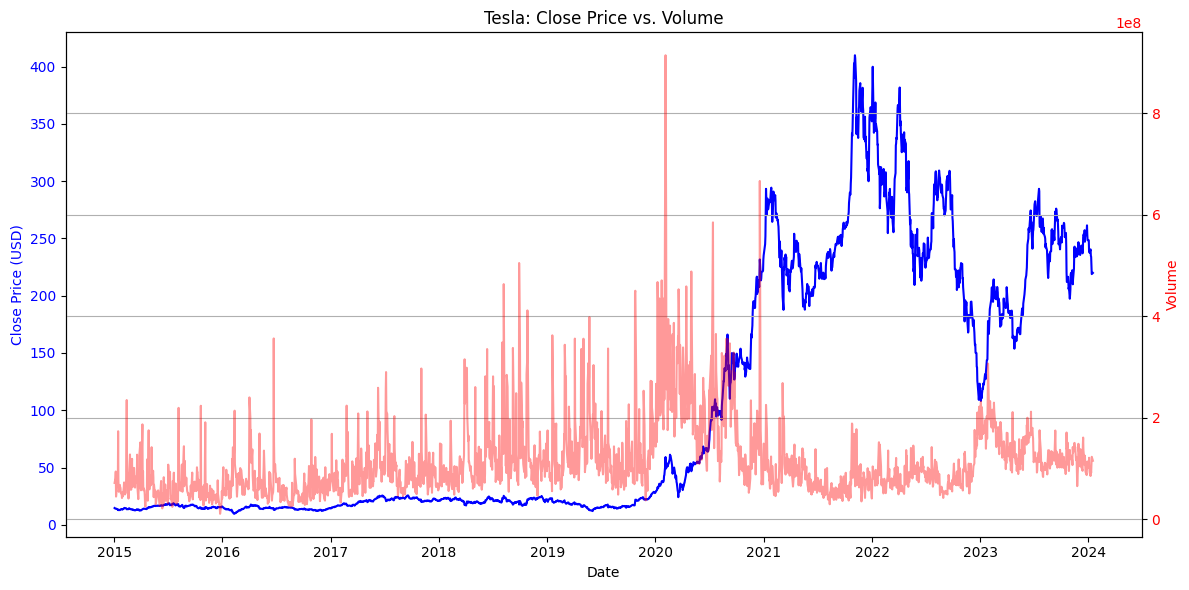

In [21]:
import matplotlib.pyplot as plt

# Plot Close Price and Volume on two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Close Price
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.plot(df['Close'], color='blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='red')
ax2.plot(df['Volume'], color='red', alpha=0.4, label='Volume')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and layout
plt.title('Tesla: Close Price vs. Volume')
fig.tight_layout()
plt.grid(True)
plt.show()


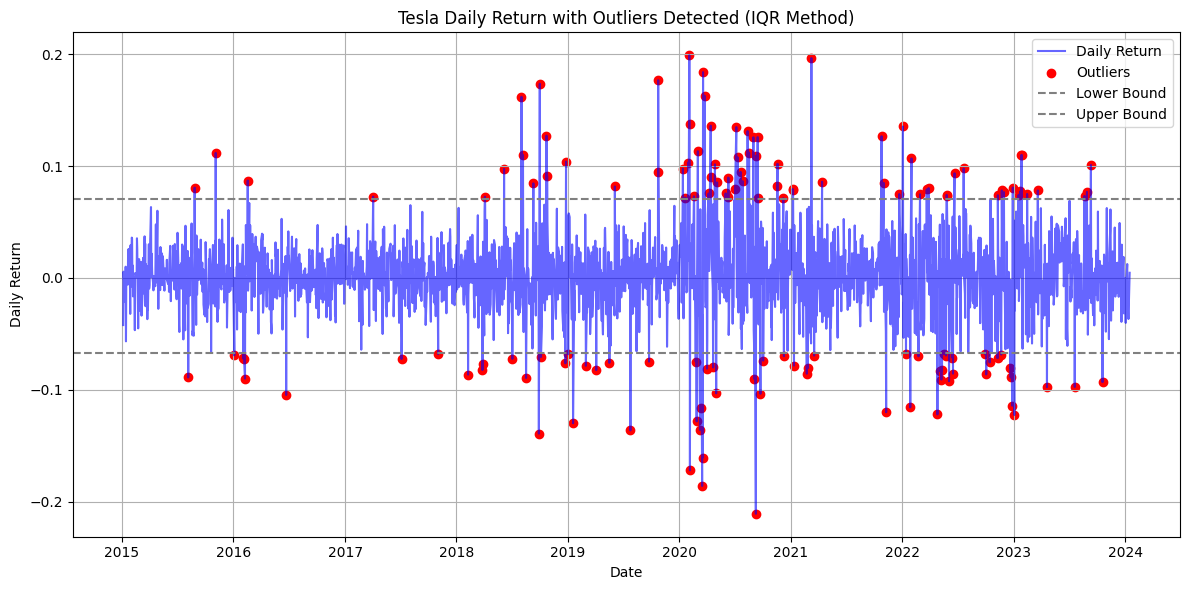

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Daily Return if not already present
df['Daily Return'] = df['Close'].pct_change()

# Drop NaNs
returns = df['Daily Return'].dropna()

# IQR method
Q1 = returns.quantile(0.25)
Q3 = returns.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = returns[(returns < lower_bound) | (returns > upper_bound)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(returns, label='Daily Return', color='blue', alpha=0.6)
plt.scatter(outliers.index, outliers, color='red', label='Outliers')
plt.axhline(lower_bound, color='gray', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='gray', linestyle='--', label='Upper Bound')
plt.title('Tesla Daily Return with Outliers Detected (IQR Method)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# print("Number of outliers detected:", len(outliers))
# print(outliers.head())

Number of outliers detected: 143
Date
2015-08-06   -0.088846
2015-08-27    0.080724
2015-11-04    0.111735
2016-01-04   -0.069164
2016-02-02   -0.071900
Name: Daily Return, dtype: float64


In [24]:
print("Number of outliers detected:", len(outliers))
print(outliers.head())

Number of outliers detected: 38
Date
2015-11-04    0.111735
2018-08-02    0.161880
2018-08-07    0.109886
2018-09-28   -0.139015
2018-10-01    0.173471
Name: Daily Return, dtype: float64


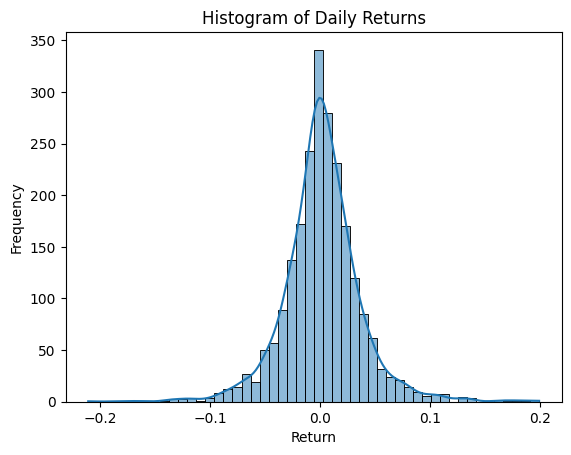

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title("Histogram of Daily Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()
